In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
import pandas as pd
df=pd.read_csv('company_profit_data.csv')
df


,Company,R&D Spend,Marketing Spend,Admin Spend,Product Cost,Revenue,Profit
0,A,120000,200000,50000,150000,500000,80000
1,B,90000,150000,40000,120000,420000,70000
2,C,150000,250000,60000,180000,600000,110000
3,D,70000,100000,30000,100000,350000,50000
4,E,110000,180000,45000,140000,470000,75000
5,F,130000,230000,55000,160000,550000,90000
6,G,80000,140000,35000,110000,390000,60000
7,H,100000,170000,48000,130000,450000,72000
8,I,95000,160000,42000,125000,430000,68000
9,J,140000,240000,57000,170000,580000,100000


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Company']=le.fit_transform(df['Company'])
df

,Company,R&D Spend,Marketing Spend,Admin Spend,Product Cost,Revenue,Profit
0,0,120000,200000,50000,150000,500000,80000
1,1,90000,150000,40000,120000,420000,70000
2,2,150000,250000,60000,180000,600000,110000
3,3,70000,100000,30000,100000,350000,50000
4,4,110000,180000,45000,140000,470000,75000
5,5,130000,230000,55000,160000,550000,90000
6,6,80000,140000,35000,110000,390000,60000
7,7,100000,170000,48000,130000,450000,72000
8,8,95000,160000,42000,125000,430000,68000
9,9,140000,240000,57000,170000,580000,100000


In [7]:
# Step 2: Define features and target
X = df[["R&D Spend", "Marketing Spend", "Admin Spend", "Product Cost", "Revenue"]]
y = df["Profit"] > 75000  # Binary classification: High Profit or not


In [11]:
# Step 3: Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
from sklearn.decomposition import PCA

# Step 4: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)




In [19]:
from sklearn.model_selection import train_test_split

#Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.svm import SVC

# Step 6: Train SVM classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

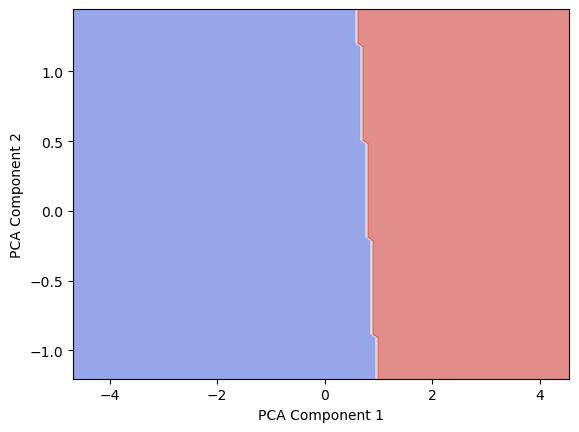

In [27]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# Step 7: Visualize decision boundary
DecisionBoundaryDisplay.from_estimator(
    classifier,
    X_train,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.6,
    xlabel="PCA Component 1",
    ylabel="PCA Component 2"
)

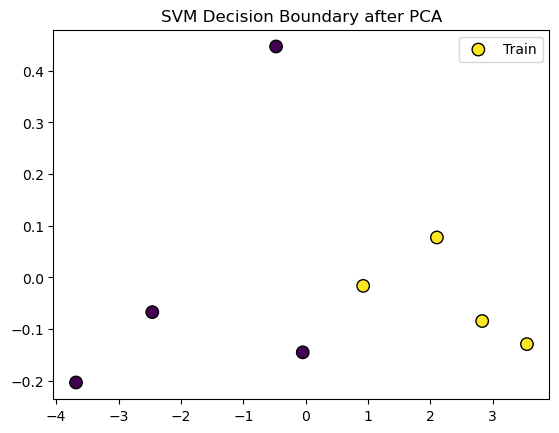

In [29]:
# Step 8: Plot points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', label='Train', s=80)
plt.title("SVM Decision Boundary after PCA")
plt.legend()
plt.show()

In [31]:
print("Explained Variance Ratio (PCA):", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio (PCA): [0.99113807 0.00608515]
Total Explained Variance: 0.9972232181316766
